<a href="https://colab.research.google.com/github/alestarbucks/zdt-moga/blob/main/moga_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

Hacer gráficas scatter con los fitness de todos los individuos y los respectivos frentes de paretos óptimos de cada problema benchmark.

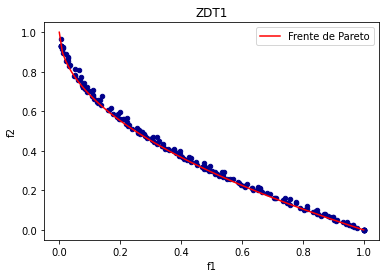

In [60]:
df = pd.read_csv('csvs/scores1.csv')
df.columns = ['f1','f2']
df.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,1,100)
y=1-np.power(x,0.5)
plt.plot(x,y,'r',label='Frente de Pareto')
plt.legend()
plt.title('ZDT1')
plt.savefig('pyplots/ZDT1',dpi=300)

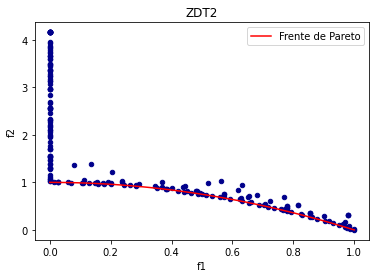

In [61]:
df = pd.read_csv('csvs/scores2.csv')
df.columns = ['f1','f2']
df.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,1,100)
y=1-np.power(x,2)
plt.plot(x,y,'r',label='Frente de Pareto')
plt.legend()
plt.title('ZDT2')
plt.savefig('pyplots/ZDT2',dpi=300)

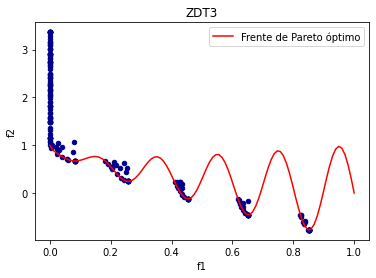

In [62]:
df = pd.read_csv('csvs/scores3.csv')
df.columns = ['f1','f2']
df.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,1,100)
y=1-np.power(x,0.5)-(x*np.sin(10*math.pi*x))
plt.plot(x,y,'r',label='Frente de Pareto óptimo')
plt.legend()
plt.title('ZDT3')
plt.savefig('pyplots/ZDT3',dpi=300)

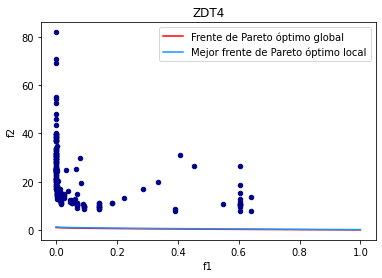

In [65]:
df = pd.read_csv('csvs/scores4.csv')
df.columns = ['f1','f2']
df.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,1,100)
y=1-np.power(x,0.5)
plt.plot(x,y,'r',label='Frente de Pareto óptimo global')
y=1.25*(1-np.power(x/1.25,0.5))
plt.plot(x,y,'dodgerblue',label='Mejor frente de Pareto óptimo local')
plt.legend()
plt.title('ZDT4')
plt.savefig('pyplots/ZDT4',dpi=300)

/tmp/ipykernel_15079/3290601526.py:6: RuntimeWarning: divide by zero encountered in true_divide
  y=10/x
/tmp/ipykernel_15079/3290601526.py:8: RuntimeWarning: divide by zero encountered in true_divide
  y=11/x


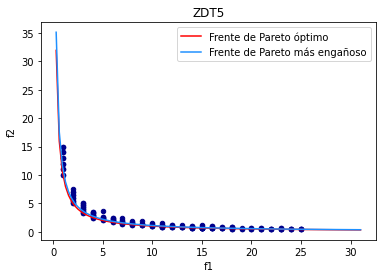

In [66]:
df = pd.read_csv('csvs/scores5.csv')
df.columns = ['f1','f2']
df.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,31,100)
y=10/x
plt.plot(x,y,'r',label='Frente de Pareto óptimo')
y=11/x
plt.plot(x,y,'dodgerblue',label='Frente de Pareto más engañoso')
plt.legend()
plt.title('ZDT5')
plt.savefig('pyplots/ZDT5',dpi=300)

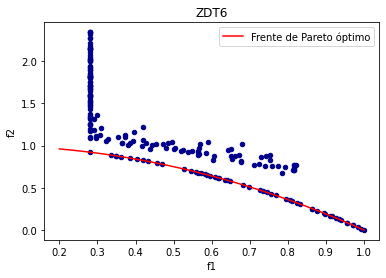

In [68]:
df = pd.read_csv('csvs/scores6.csv')
df.columns = ['f1','f2']
df.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0.2,1,100)
y=1-np.power(x,2)
plt.plot(x,y,'r',label='Frente de Pareto óptimo')
plt.legend()
plt.title('ZDT6')
plt.savefig('pyplots/ZDT6',dpi=300)